# Примеры и упражнения по Python3 - уровень с графикой

Автор-составитель - Михаил Колодин

Версия 2021-04-17 от 2021-04-18 - 1.1

Разделы:
* [Параметры системы](#params)
* [Черепашья графика](#turtle)
* [Динамические графики функций](#dynamo)
* [Научная графика matplotlib](#matplotlib)
* [Рисование на холсте canvas в Tkinter](#canvas)
* [Библиотека PIL](#PIL)
* [Обработка изображений](#images)

**Параметры системы** <a name=params></a>

In [1]:
import sys
print("Python version:", sys.version)

from platform import python_version
print(python_version())

Python version: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
3.8.8


**Черепашья графика** <a name=turtle></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import turtle as t

t.shape('turtle')
t.color('green', 'yellow')

In [2]:
t.begin_fill()

while True:
    t.forward(200)
    t.left(170)
    if abs(t.pos()) < 1:
        break

t.end_fill()

t.done()

**Динамические графики функций** <a name=dynamo></a>

Простая колебательная функция

In [16]:
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact,FloatSlider,IntSlider
%matplotlib inline
def plotPP(p,p_LP,Tperiods):
    t=np.linspace(0,Tperiods*(np.pi*2),1000)
    f = plt.figure(figsize=(1.618*6,6))
    p_t = p*(1.0+np.cos(t))
    plt.plot(t,p_t,'b',lw=2.0)
    plt.axhline(p_LP,color='r',lw=2.0)
    plt.xlim([t[0],t[-1]])
    plt.ylim([min(p_LP,np.amin(p_t))-0.1,np.amax(p_t)+0.1])
    plt.ylabel(r'$p$')
    plt.xlabel(r'$t$')
    plt.grid(True)

p_s       = FloatSlider(min=0, max=2, step=0.01, value=1.0)
p_LP_s    = FloatSlider(min=0, max=2., step=0.01, value=0.481343)
Tperiods_s= IntSlider(min=1,max=10,value=1)
interact(plotPP,p=p_s,p_LP=p_LP_s,Tperiods=Tperiods_s)

interactive(children=(FloatSlider(value=1.0, description='p', max=2.0, step=0.01), FloatSlider(value=0.481343,…

<function __main__.plotPP(p, p_LP, Tperiods)>

***График квадратичной функции***

полезен для наглядного решений квадратных уравнений

In [18]:
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact,FloatSlider,IntSlider
%matplotlib inline
LIM = 5
def plotPP(a, b, c):
    t=np.linspace(-LIM, LIM, 100)
    f = plt.figure(figsize=(10, 10))
    y = a*t*t + b*t + c
    plt.plot(t, y, 'g')
    plt.xlim([-LIM, LIM])
    plt.ylim([-LIM, LIM])
    plt.ylabel(r'$y$')
    plt.xlabel(r'$x$')
    #plt.tight_layout()
    plt.grid(True)

a = FloatSlider(min=-LIM, max=LIM, step=0.1, value=0.0)
b = FloatSlider(min=-LIM, max=LIM, step=0.1, value=0.0)
c = FloatSlider(min=-LIM, max=LIM, step=0.1, value=0.0)
interact(plotPP, a=a, b=b, c=c)

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

<function __main__.plotPP(a, b, c)>

***Creating dashboard layouts***

https://jupyter-dashboards-layout.readthedocs.io/en/latest/using.html


In [7]:
%matplotlib inline

import seaborn as sns
from ipywidgets import interact

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
@interact(hue=['smoker', 'sex', 'time', 'day'])
def plot(hue):
    _ = sns.pairplot(tips, hue=hue)

interactive(children=(Dropdown(description='hue', options=('smoker', 'sex', 'time', 'day'), value='smoker'), O…

***ipycanvas***

https://blog.jupyter.org/ipycanvas-a-python-canvas-for-jupyter-bbb51e4777f7

https://github.com/martinRenou/ipycanvas/

https://ipycanvas.readthedocs.io/en/latest/drawing_shapes.html

In [6]:
import numpy as np

from ipycanvas import Canvas

n_particles = 100_000

x = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
y = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
size = np.random.randint(1, 3, n_particles)

canvas = Canvas(width=800, height=500)

canvas.fill_style = 'green'
canvas.fill_rects(x, y, size)

canvas

Canvas(width=800)

***Динамическая картинка***

https://overcoder.net/q/209754/%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%8C-%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8-%D0%B8%D0%B7%D0%BC%D0%B5%D0%BD%D1%8F%D1%8E%D1%89%D0%B8%D0%B9%D1%81%D1%8F-%D0%B3%D1%80%D0%B0%D1%84-%D1%81-%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E-matplotlib-%D0%B2-jupyter-notebook


<IPython.core.display.Javascript object>


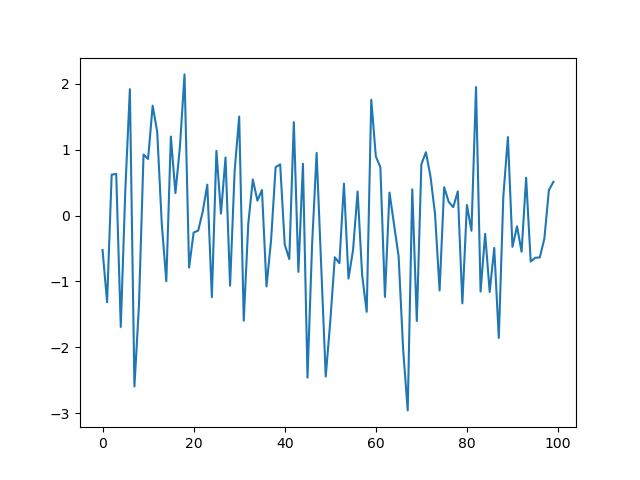

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

**Научная графика matplotlib** <a name=matplotlib></a>

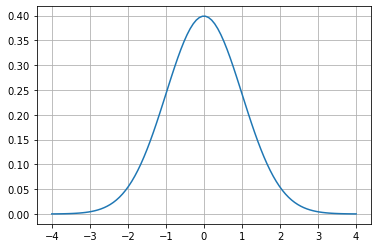

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mu = 0
std = 1
x = np.linspace(start=-4, stop=4, num=100)
y = stats.norm.pdf(x, mu, std) 
plt.grid(True)
plt.plot(x, y)
plt.show()

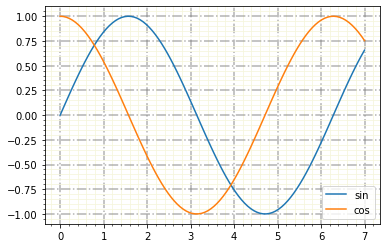

In [24]:
#import numpy as np
#import matplotlib.pyplot as plt
x = np.linspace(0, 7, 100)
line1, = plt.plot(x, np.sin(x), label='sin')
line2, = plt.plot(x, np.cos(x), label='cos')
plt.legend(handles=[line1, line2], loc='lower right')
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
plt.show()

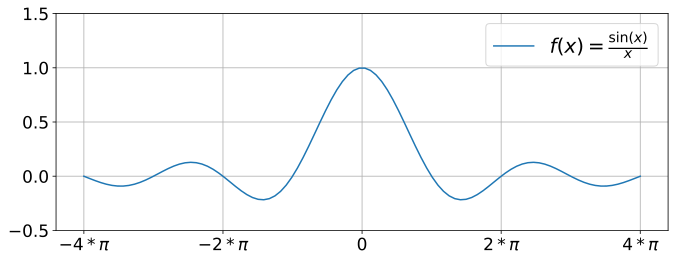

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#import numpy as np
#import matplotlib.pyplot as plt

pi = np.pi
x = np.linspace(-4*pi, 4*pi, 100)
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 17})
plt.xticks([-4*pi, -2*pi, 0, 2*pi, 4*pi],
          ['$-4*\pi$', '$-2*\pi$', '$0$', '$2*\pi$', '$4*\pi$'])
plt.plot(x, np.sin(x)/x, label = r'$f(x)=\frac{\sin(x)}{x}$')
plt.ylim(-0.5, 1.5)
plt.legend(loc='best', fontsize=20)
plt.grid(True)
plt.show()

<AxesSubplot:>

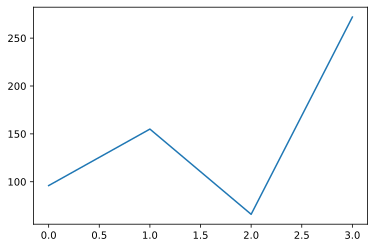

In [15]:
import pandas
import matplotlib
%matplotlib inline
baby_name = ['Alice','Charles','Diane','Edward']
number_births = [96, 155, 66, 272]
dataset = list(zip(baby_name,number_births))
df = pandas.DataFrame(data = dataset, columns=['Name', 'Number'])
df['Number'].plot()

3.3.4


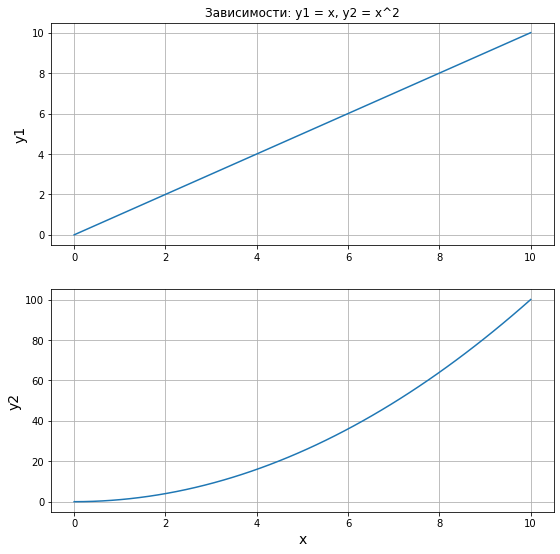

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print(matplotlib.__version__)

x = np.linspace(0, 10, 50)
y1 = x # Линейная зависимость
y2 = [i**2 for i in x] # Квадратичная зависимость
# Построение графиков
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(x, y1)
# построение графика
plt.title('Зависимости: y1 = x, y2 = x^2') # заголовок
plt.ylabel('y1', fontsize=14) # ось ординат
plt.grid(True) # включение отображение сетки
plt.subplot(2, 1, 2)
plt.plot(x, y2) # построение графика
plt.xlabel('x', fontsize=14) # ось абсцисс
plt.ylabel('y2', fontsize=14) # ось ординат
plt.grid(True) # включение отображение сетки

Text(0, 0.5, 'Count')

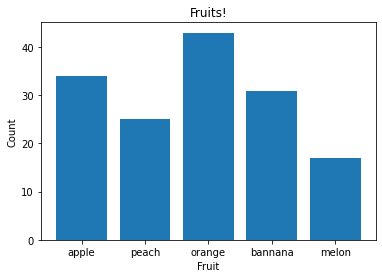

In [3]:
fruits = ['apple', 'peach', 'orange', 'bannana', 'melon']
counts = [34, 25, 43, 31, 17]
plt.bar(fruits, counts)
plt.title('Fruits!')
plt.xlabel('Fruit')
plt.ylabel('Count')

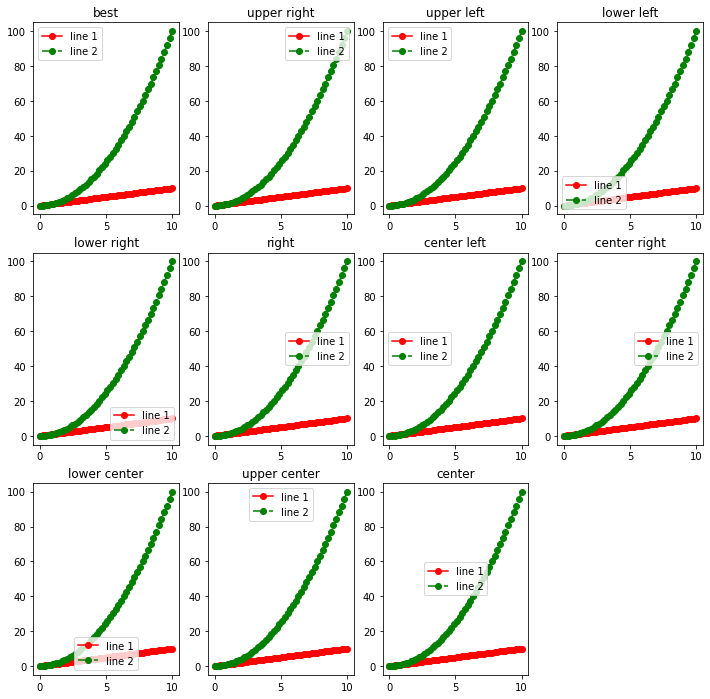

In [4]:
locs = ['best', 'upper right', 'upper left', 'lower left',
'lower right', 'right', 'center left', 'center right',
'lower center', 'upper center', 'center']
plt.figure(figsize=(12, 12))
for i in range(3):
    for j in range(4):
        if i*4+j < 11:
            plt.subplot(3, 4, i*4+j+1)
            plt.title(locs[i*4+j])
            plt.plot(x, y1, 'o-r', label='line 1')
            plt.plot(x, y2, 'o-.g', label='line 2')
            plt.legend(loc=locs[i*4+j])
        else:
            break

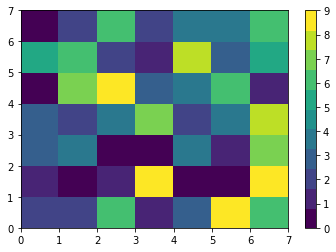

In [5]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(vals, cmap=plt.get_cmap('viridis', 11) )
plt.colorbar()

(-1.1163226287452406,
 1.1007772680354877,
 -1.1107362350259515,
 1.1074836529113834)

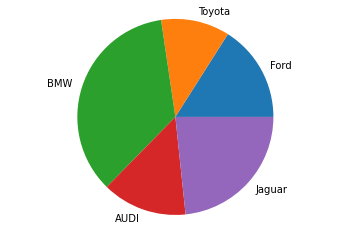

In [6]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMW', 'AUDI', 'Jaguar']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis('equal')

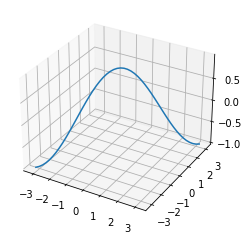

In [7]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='parametric curve')

No handles with labels found to put in legend.


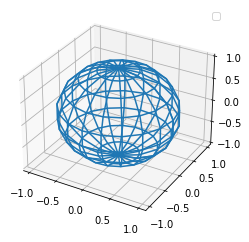

In [8]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.legend()

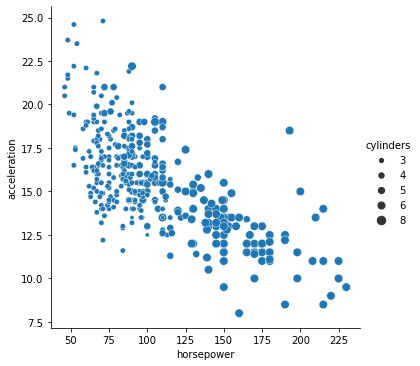

In [9]:
import seaborn as sns
mpg = sns.load_dataset("mpg")
sns.relplot(x="horsepower", y="acceleration", size="cylinders", data=mpg)

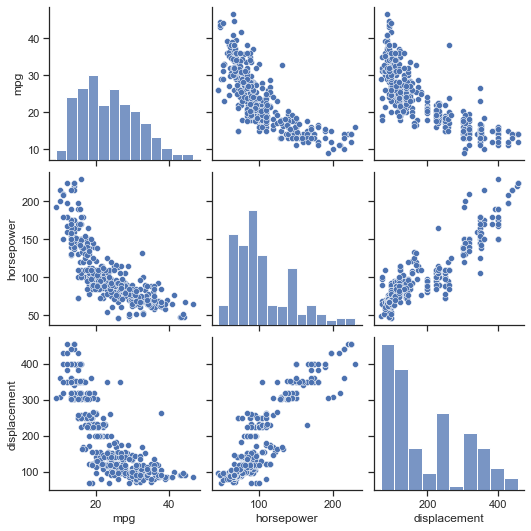

In [10]:
sns.set(style="ticks")
mpg = sns.load_dataset("mpg")
mpg_mod = mpg[["mpg", "horsepower", "displacement", "origin"]]
sns.pairplot(mpg_mod)

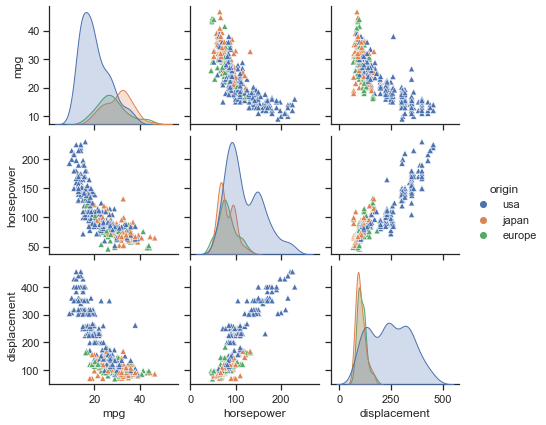

In [11]:
sns.pairplot(mpg_mod, hue="origin", markers="^", height=2, aspect=1.1)

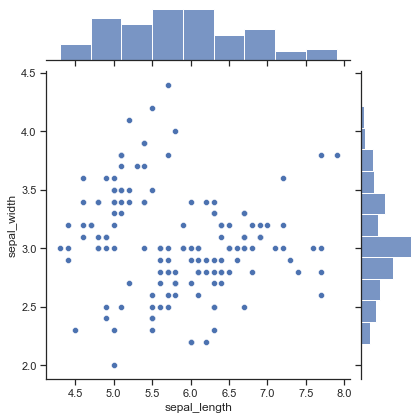

In [12]:
iris = sns.load_dataset("iris")
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)

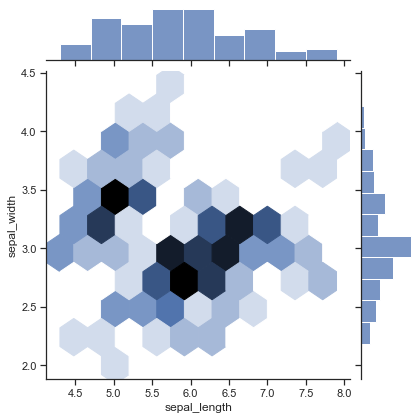

In [13]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="hex")

**Рисование на холсте canvas (Tkinter)** <a name=canvas></a>

Tkinter canvas

In [6]:
from tkinter import *
master = Tk()

w = Canvas(master, width=200, height=100)
w.pack()

w.create_rectangle(50, 20, 150, 80, fill="#476042")
w.create_rectangle(65, 35, 135, 65, fill="yellow")
w.create_line(0, 0, 50, 20, fill="#476042", width=3)
w.create_line(0, 100, 50, 80, fill="#476042", width=3)
w.create_line(150,20, 200, 0, fill="#476042", width=3)
w.create_line(150, 80, 200, 100, fill="#476042", width=3)

mainloop()

In [18]:
from tkinter import *

canvas_width = 400
canvas_height =400
python_green = "#476042"

def polygon_star(canvas, x,y,p,t, outline=python_green, fill='yellow', width = 1):
   points = []
   for i in (1,-1):
      points.extend((x,	      y + i*p))
      points.extend((x + i*t, y + i*t))
      points.extend((x + i*p, y))
      points.extend((x + i*t, y - i * t))

   print(points)

   canvas.create_polygon(points, outline=outline, 
                         fill=fill, width=width)

master = Tk()

w = Canvas(master, 
           width=canvas_width, 
           height=canvas_height)
w.pack()

p = 50
t = 15

nsteps = 10
step_x = int(canvas_width / nsteps)
step_y = int(canvas_height / nsteps)

for i in range(1, nsteps):
   polygon_star(w,i*step_x,i*step_y,p,t,outline='red',fill='gold', width=3)
   polygon_star(w,i*step_x,canvas_height - i*step_y,p,t,outline='red',fill='gold', width=3)

mainloop()

[40, 90, 55, 55, 90, 40, 55, 25, 40, -10, 25, 25, -10, 40, 25, 55]
[40, 410, 55, 375, 90, 360, 55, 345, 40, 310, 25, 345, -10, 360, 25, 375]
[80, 130, 95, 95, 130, 80, 95, 65, 80, 30, 65, 65, 30, 80, 65, 95]
[80, 370, 95, 335, 130, 320, 95, 305, 80, 270, 65, 305, 30, 320, 65, 335]
[120, 170, 135, 135, 170, 120, 135, 105, 120, 70, 105, 105, 70, 120, 105, 135]
[120, 330, 135, 295, 170, 280, 135, 265, 120, 230, 105, 265, 70, 280, 105, 295]
[160, 210, 175, 175, 210, 160, 175, 145, 160, 110, 145, 145, 110, 160, 145, 175]
[160, 290, 175, 255, 210, 240, 175, 225, 160, 190, 145, 225, 110, 240, 145, 255]
[200, 250, 215, 215, 250, 200, 215, 185, 200, 150, 185, 185, 150, 200, 185, 215]
[200, 250, 215, 215, 250, 200, 215, 185, 200, 150, 185, 185, 150, 200, 185, 215]
[240, 290, 255, 255, 290, 240, 255, 225, 240, 190, 225, 225, 190, 240, 225, 255]
[240, 210, 255, 175, 290, 160, 255, 145, 240, 110, 225, 145, 190, 160, 225, 175]
[280, 330, 295, 295, 330, 280, 295, 265, 280, 230, 265, 265, 230, 280, 26

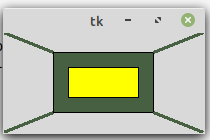

In [9]:
from PIL import Image
pic = 'pic18.png'
img = Image.open(pic)
img

**TkInter Canvas**

In [10]:
from tkinter import Tk, Canvas, Frame, BOTH
 
class Example(Frame):
 
    def __init__(self):
        super().__init__()
        self.initUI()
 
    def initUI(self):
        self.master.title("Рисуем линии")
        self.pack(fill=BOTH, expand=1)
 
        canvas = Canvas(self)
        canvas.create_line(15, 25, 200, 25)
        canvas.create_line(300, 35, 300, 200, dash=(4, 2))
        canvas.create_line(55, 85, 155, 85, 105, 180, 55, 85)
 
        canvas.pack(fill=BOTH, expand=1)
 
def main1():
    root = Tk()
    ex = Example()
    root.geometry("400x250+300+300")
    root.mainloop()
    
main1()

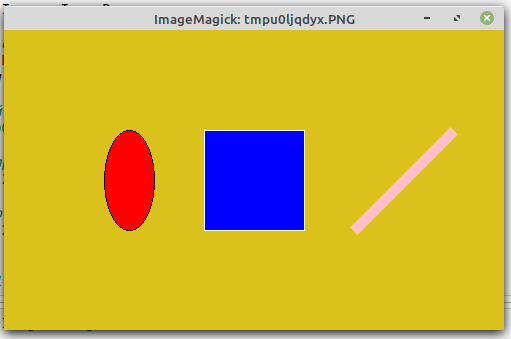

In [11]:
from PIL import Image
pic = 'pic17.png'
img = Image.open(pic)
img

**Библиотека PIL** <a name=PIL></a>

* https://devsday.ru/blog/details/30502
* https://younglinux.info/tkinter/canvas
* https://otus.ru/journal/grafika-v-python-tkinter-i-canvas/
* https://www.youtube.com/watch?v=Yqt1U3Xoask
* https://pythonru.com/uroki/canvas-risovanie-grafiki-ch-1-tkinter-18
* https://python-scripts.com/tkinter-canvas-example


In [3]:
from PIL import Image, ImageDraw
 
# Пустой желтый фон.
im = Image.new('RGB', (500, 300), (219, 193, 27))
draw = ImageDraw.Draw(im)
 
# Рисуем красный эллипс с черной окантовкой.
draw.ellipse((100, 100, 150, 200), fill='red', outline=(0, 0, 0))
 
# Рисуем синий прямоугольник с белой окантовкой.
draw.rectangle((200, 100, 300, 200), fill='blue', outline=(255, 255, 255))
 
# Рисуем розовую линию с шириной в 10 пиксель.
draw.line((350, 200, 450, 100), fill='pink', width=10)
 
im.show()
#im.save('pil-01.jpg', quality=95)

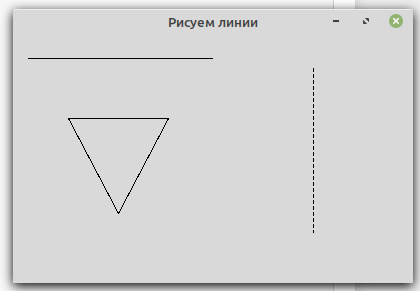

In [13]:
from PIL import Image
pic = 'pic19.png'
img = Image.open(pic)
img

In [4]:
from PIL import Image, ImageDraw
size = 500
im = Image.new('RGB', (size, size), (255, 255, 255))
draw = ImageDraw.Draw(im)

for i in range(0, size, 10):
    draw.line(xy = ((0, i), (i, size), (size, size-i), (size-i, 0), (0, i)), fill = 'black', width = 1)
    
im.show()
#im.save('pil-02.jpg', quality=95)

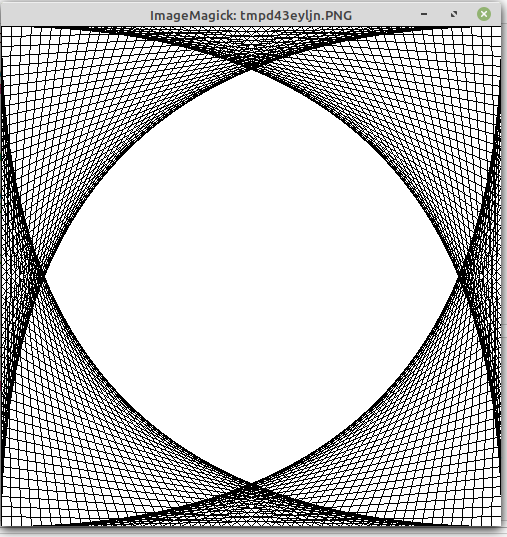

In [14]:
from PIL import Image
pic = 'pic20.png'
img = Image.open(pic)
img

In [5]:
from PIL import Image, ImageDraw
size = 500
im = Image.new('RGB', (size, size), (255, 255, 255))
draw = ImageDraw.Draw(im)

for i in range(0, size, 10):
    draw.line(xy = ( (0, 0), (i, size) ), fill = 'black', width = 1)
    draw.line(xy = ( (0, 0), (size, size-i) ), fill = 'black', width = 1)
    draw.line(xy = ( (size, size), (i, 0) ), fill = 'black', width = 1)
    draw.line(xy = ( (size, size), (0, i) ), fill = 'black', width = 1)
    
im.show()
#im.save('pil-03.jpg', quality=95)

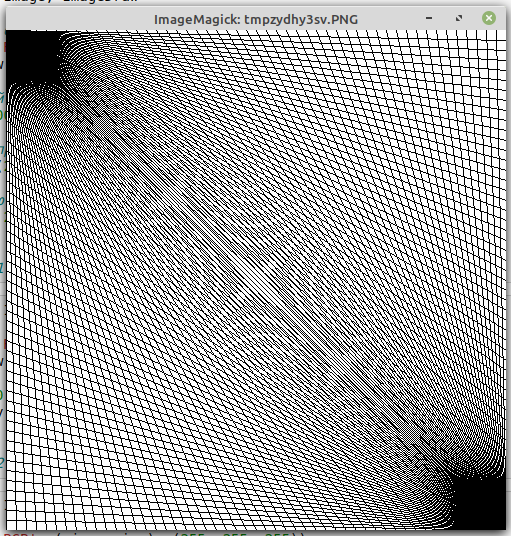

In [15]:
from PIL import Image
pic = 'pic21.png'
img = Image.open(pic)
img

**Обработка изображений** <a name=images></a>

***Просто картинки***

чтение, преобразования (изменение размера, цвета), запись в другой файл (другого типа), можно и многое другое

In [12]:
from PIL import Image
pic = 'pig1.jpg'
img = Image.open(pic)

In [13]:
img.show()

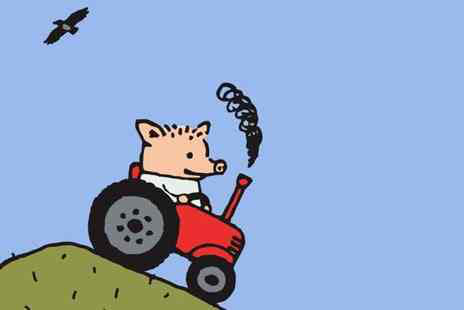

In [14]:
img

In [15]:
print(img.size, img.format)

(464, 310) JPEG


In [16]:
#img.save(pic + '.png')

In [17]:
# делаем миниатюру
img.thumbnail((300,300))
img.show()

In [18]:
gray_img = Image.open(pic).convert('L')
gray_img.show()

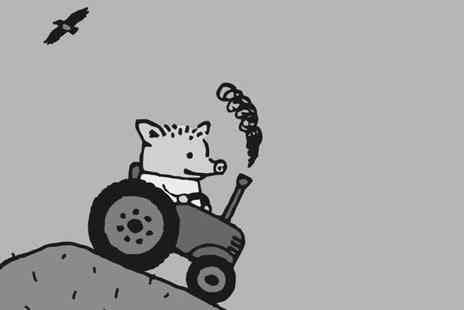

In [27]:
gray_img

In [30]:
#gray_img.save(pic + '-gray.png','png')